In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import chart_studio
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode
import chart_studio.plotly as py
%matplotlib inline
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
calls_data=pd.read_csv('911.csv')

In [6]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
calls_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [18]:
calls_data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [19]:
calls_data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [22]:
calls_data['title'].nunique()

110

In [6]:
calls_data['Reason']=calls_data['title'].apply(lambda title:title.split(':')[0])

In [26]:
calls_data[['Reason']]

,Reason
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS
...,...
99487,Traffic
99488,Traffic
99489,EMS
99490,EMS


In [27]:
calls_data['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

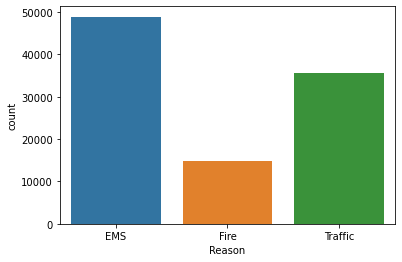

In [29]:
sns.countplot(calls_data['Reason'])

In [34]:
type(calls_data['timeStamp'].iloc[0])

str

In [8]:
calls_data['timeStamp']=pd.to_datetime(calls_data['timeStamp'])

In [34]:
calls_data['Hour']=calls_data['timeStamp'].apply(lambda time:time.hour)
calls_data['Month']=calls_data['timeStamp'].apply(lambda time:time.month)
calls_data['Day of Week']=calls_data['timeStamp'].apply(lambda time:time.dayofweek)

In [35]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [36]:
calls_data['Day of Week']=calls_data['Day of Week'].map(dmap)

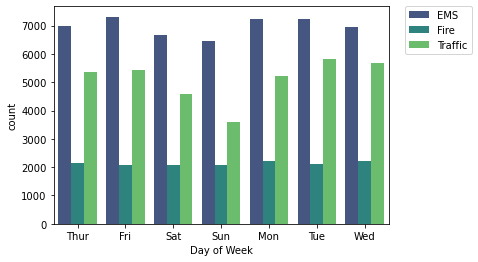

In [37]:
sns.countplot(x='Day of Week',data=calls_data, hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

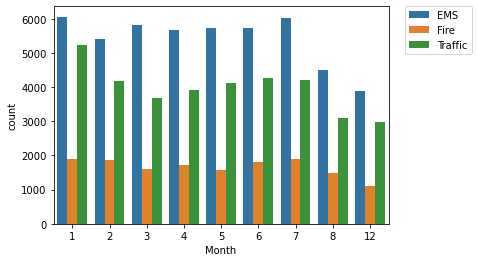

In [38]:
sns.countplot(x='Month',data=calls_data,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [39]:
byMonth=calls_data.groupby('Month').count()
byMonth.head()
mmap={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
calls_data['Month'].map(mmap)

0        Dec
1        Dec
2        Dec
3        Dec
4        Dec
        ... 
99487    Aug
99488    Aug
99489    Aug
99490    Aug
99491    Aug
Name: Month, Length: 99492, dtype: object

<AxesSubplot:xlabel='Month'>

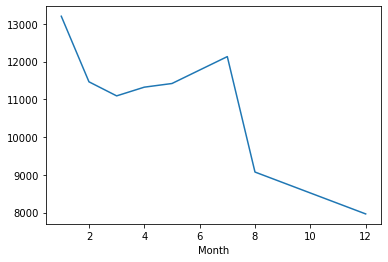

In [40]:
byMonth['twp'].plot()

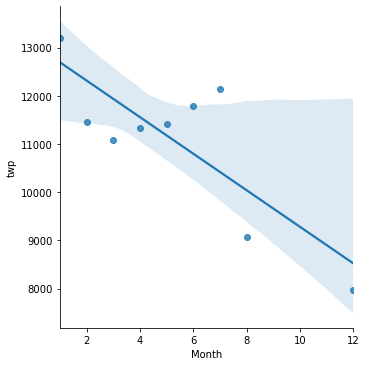

In [41]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [14]:
calls_data['Date']=calls_data['timeStamp'].apply(lambda t:t.date())

In [15]:
byDate=calls_data.groupby('Date')['twp'].count()

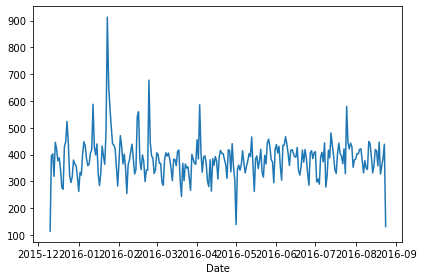

In [16]:
byDate.plot()
plt.tight_layout()

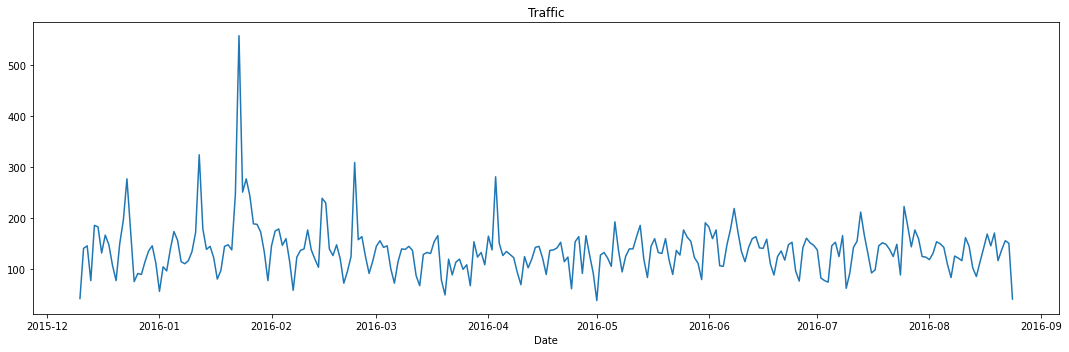

In [77]:
fig=plt.figure(figsize=(15,5))
calls_data[calls_data['Reason']=='Traffic'].groupby('Date')['twp'].count().plot()
plt.title('Traffic')
plt.tight_layout()

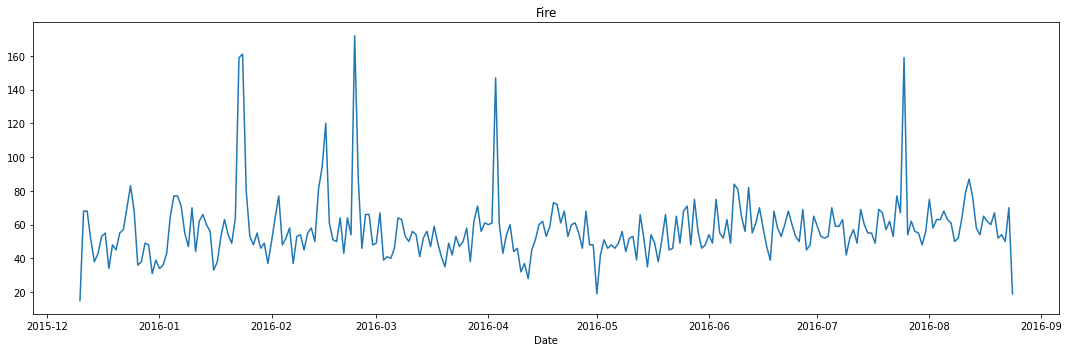

In [78]:
fig=plt.figure(figsize=(15,5))
calls_data[calls_data['Reason']=='Fire'].groupby('Date')['twp'].count().plot()
plt.title('Fire')
plt.tight_layout()

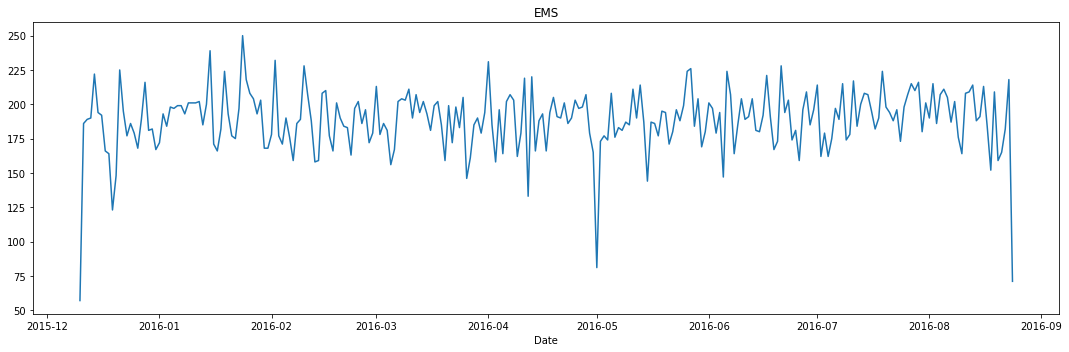

In [23]:
fig=plt.figure(figsize=(15,5))
calls_data[calls_data['Reason']=='EMS'].groupby('Date')['twp'].count().plot()
plt.title('EMS')
plt.tight_layout()

In [42]:
dayHour=calls_data.groupby(['Day of Week','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

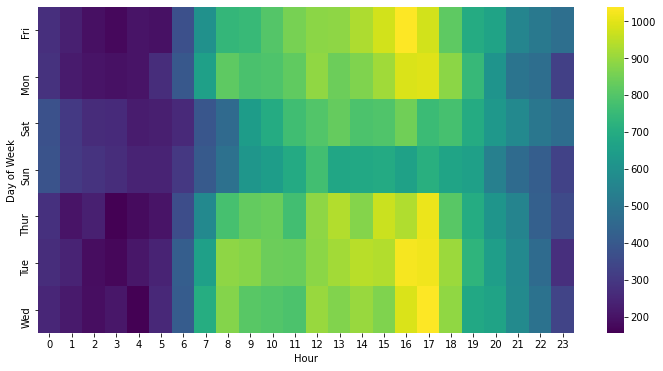

In [43]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

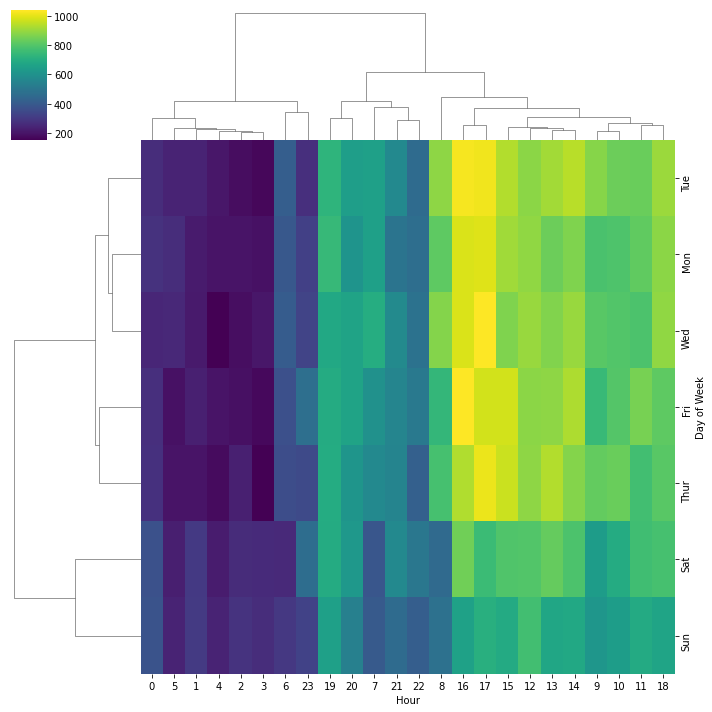

In [44]:
sns.clustermap(dayHour,cmap='viridis')

In [46]:
dayMonth=calls_data.groupby(['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thur,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

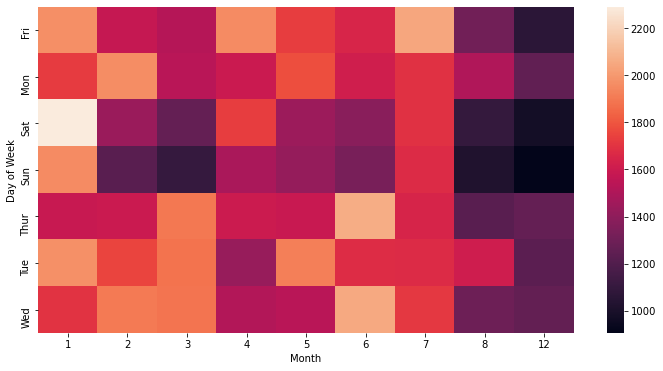

In [47]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

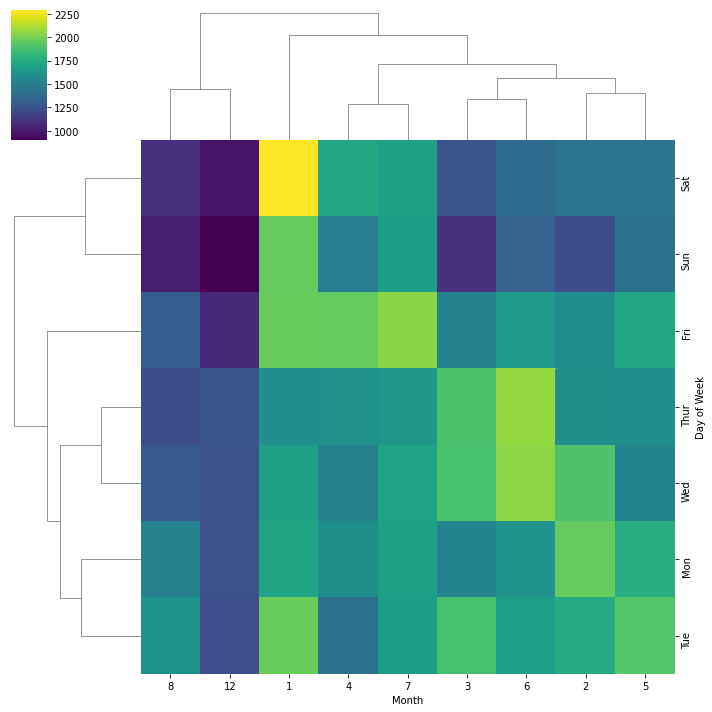

In [48]:
sns.clustermap(dayMonth,cmap='viridis')